<a href="https://colab.research.google.com/github/BountyHunter1999/Learning-PyTorch-Notebooks/blob/main/8_CNN_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

Files already downloaded and verified


In [3]:
test_dataset = torchvision.datasets.CIFAR10(
    root=".",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

Files already downloaded and verified


In [4]:
# behaves differently from MNIST/ Fashion MNIST
# it is a Numpy array
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
# we are working with color image now
train_dataset.data.shape

(50000, 32, 32, 3)

In [6]:
# behave differently from MNIST / Fashion MNIST
# it is a list!
train_dataset.targets

[6,
 9,
 9,
 4,
 1,
 1,
 2,
 7,
 8,
 3,
 4,
 7,
 7,
 2,
 9,
 9,
 9,
 3,
 2,
 6,
 4,
 3,
 6,
 6,
 2,
 6,
 3,
 5,
 4,
 0,
 0,
 9,
 1,
 3,
 4,
 0,
 3,
 7,
 3,
 3,
 5,
 2,
 2,
 7,
 1,
 1,
 1,
 2,
 2,
 0,
 9,
 5,
 7,
 9,
 2,
 2,
 5,
 2,
 4,
 3,
 1,
 1,
 8,
 2,
 1,
 1,
 4,
 9,
 7,
 8,
 5,
 9,
 6,
 7,
 3,
 1,
 9,
 0,
 3,
 1,
 3,
 5,
 4,
 5,
 7,
 7,
 4,
 7,
 9,
 4,
 2,
 3,
 8,
 0,
 1,
 6,
 1,
 1,
 4,
 1,
 8,
 3,
 9,
 6,
 6,
 1,
 8,
 5,
 2,
 9,
 9,
 8,
 1,
 7,
 7,
 0,
 0,
 6,
 9,
 1,
 2,
 2,
 9,
 2,
 6,
 6,
 1,
 9,
 5,
 0,
 4,
 7,
 6,
 7,
 1,
 8,
 1,
 1,
 2,
 8,
 1,
 3,
 3,
 6,
 2,
 4,
 9,
 9,
 5,
 4,
 3,
 6,
 7,
 4,
 6,
 8,
 5,
 5,
 4,
 3,
 1,
 8,
 4,
 7,
 6,
 0,
 9,
 5,
 1,
 3,
 8,
 2,
 7,
 5,
 3,
 4,
 1,
 5,
 7,
 0,
 4,
 7,
 5,
 5,
 1,
 0,
 9,
 6,
 9,
 0,
 8,
 7,
 8,
 8,
 2,
 5,
 2,
 3,
 5,
 0,
 6,
 1,
 9,
 3,
 6,
 9,
 1,
 3,
 9,
 6,
 6,
 7,
 1,
 0,
 9,
 5,
 8,
 5,
 2,
 9,
 0,
 8,
 8,
 0,
 6,
 9,
 1,
 1,
 6,
 3,
 7,
 6,
 6,
 0,
 6,
 6,
 1,
 7,
 1,
 5,
 8,
 3,
 6,
 6,
 8,
 6,
 8,
 4,
 6,
 6,


In [7]:
# number of classes
K = len(set(train_dataset.targets))
print("Number of classes:", K)

Number of classes: 10


In [8]:
# Data Loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling

batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [9]:
# the data transformer mapped the data to (0, 1)
# and also moved the color channel before height/width
# pytorch hides this detail by making us use special dataloader and dataset function
tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=1,
                                         shuffle=True)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.1529, 0.1294, 0.2784,  ..., 0.1255, 0.1255, 0.1255],
          [0.1490, 0.1451, 0.2392,  ..., 0.1333, 0.1333, 0.1255],
          [0.2039, 0.1804, 0.2157,  ..., 0.1490, 0.1412, 0.1294],
          ...,
          [0.3373, 0.3137, 0.3137,  ..., 0.3059, 0.3373, 0.3647],
          [0.3333, 0.3569, 0.3647,  ..., 0.3686, 0.3490, 0.3725],
          [0.3255, 0.3529, 0.3490,  ..., 0.3608, 0.3725, 0.3922]],

         [[0.1373, 0.1255, 0.2235,  ..., 0.0902, 0.0902, 0.0902],
          [0.1059, 0.1333, 0.2078,  ..., 0.0980, 0.0980, 0.0902],
          [0.1412, 0.1490, 0.2000,  ..., 0.1137, 0.1059, 0.0941],
          ...,
          [0.2745, 0.2588, 0.2941,  ..., 0.2667, 0.2941, 0.3216],
          [0.2745, 0.3098, 0.3451,  ..., 0.3216, 0.2941, 0.3255],
          [0.2627, 0.3059, 0.3059,  ..., 0.2941, 0.2980, 0.3294]],

         [[0.1333, 0.1216, 0.2157,  ..., 0.1059, 0.1020, 0.1020],
          [0.1020, 0.1294, 0.1961,  ..., 0.1137, 0.1098, 0.1020],
          [0.1294, 0.1490, 0.1804,  ..., 0

In [10]:
# Define the model
# Define the model
class CNN(nn.Module):
  def __init__(self, x):
    super(CNN, self).__init__()

    # define the conv layers
    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2)

    # define the linear layers
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, K)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x)) 
    x = x.view(-1, 128 * 3 * 3)
    x = F.dropout(x, p=0.5)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, p=0.2)
    x = self.fc2(x)
    return x

In [11]:
128*3*3

1152

In [12]:
# Instantiate the model
model = CNN(K)

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [14]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [15]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data into GPU if available
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward pass
      outputs = model(inputs) # calls the forward function
      loss = criterion(outputs, targets)

      # Backward and optimize
      loss.backward()
      optimizer.step()

      # train_loss over each iteration
      train_loss.append(loss.item())

    # Get train and test loss
    # this mean gives the train_loss over a epoch
    train_loss = np.mean(train_loss) # a little misleading

    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item()) # iteration test loss
    test_loss = np.mean(test_loss) # epochs test loss

    # Save losses
    train_losses[it] = train_loss
    test_losses[it] = test_loss

    dt = datetime.now() - t0
    print(f'Epoch: {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
    
  return train_losses, test_losses

In [16]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch: 1/15, Train Loss: 1.7030,       Test Loss: 1.4736, Duration: 0:00:29.185598
Epoch: 2/15, Train Loss: 1.4099,       Test Loss: 1.3408, Duration: 0:00:14.870308
Epoch: 3/15, Train Loss: 1.3002,       Test Loss: 1.3015, Duration: 0:00:14.967531
Epoch: 4/15, Train Loss: 1.2117,       Test Loss: 1.2783, Duration: 0:00:19.157028
Epoch: 5/15, Train Loss: 1.1538,       Test Loss: 1.1581, Duration: 0:00:14.885068
Epoch: 6/15, Train Loss: 1.0878,       Test Loss: 1.1271, Duration: 0:00:19.067584
Epoch: 7/15, Train Loss: 1.0470,       Test Loss: 1.1050, Duration: 0:00:20.110375
Epoch: 8/15, Train Loss: 1.0035,       Test Loss: 1.0755, Duration: 0:00:19.373905
Epoch: 9/15, Train Loss: 0.9598,       Test Loss: 1.0474, Duration: 0:00:15.358671
Epoch: 10/15, Train Loss: 0.9260,       Test Loss: 1.0615, Duration: 0:00:17.747982
Epoch: 11/15, Train Loss: 0.8889,       Test Loss: 1.0506, Duration: 0:00:15.428680
Epoch: 12/15, Train Loss: 0.8569,       Test Loss: 1.0226, Duration: 0:00:16.555805
E

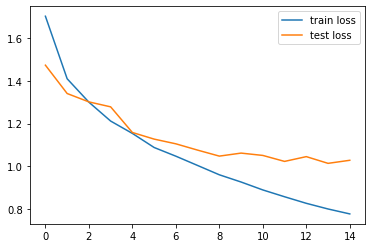

In [17]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [18]:
# Accuracy 

n_correct = 0
n_total = 0
for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction 
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1) # max_values and its argument

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.7402, Test acc: 0.6461


In [21]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  """
  This Function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = ".2f" if normalize  else "d"
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

Confusion matrix, without normalization
[[700  47  36  24  11   5   8  18 118  33]
 [ 22 781   8   8   1   5   4   5  42 124]
 [ 92   7 517  44 102  81  54  52  32  19]
 [ 27  17  80 420  63 222  62  56  30  23]
 [ 32   8 101  48 528  66  61 131  14  11]
 [ 13   8  68 153  45 564  32  82  20  15]
 [ 10  12  47  66  46  44 727  21  10  17]
 [ 18   5  33  29  43  68   4 769  11  20]
 [ 55  52   5  12  10   7   1   4 821  33]
 [ 49 159  10  10   3  11   2  31  39 686]]


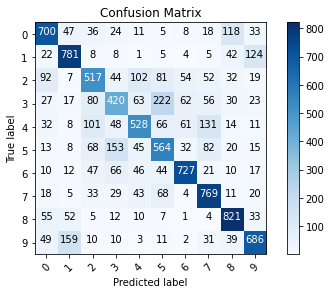

In [22]:
# get all predictions in an array and plot confusion matrix
x_test = test_dataset.data
y_test = np.array(test_dataset.targets)
p_test = np.array([])
for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update p_test
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [23]:
# label mapping
labels = """airplane
        automobile
        bird
        cat
        deer
        dog
        frog
        horse
        ship
        truck""".split()

Text(0.5, 1.0, 'True label: bird Predicted: deer')

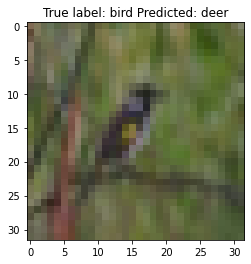

In [24]:
# Show some misclassified examples
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title(f"True label: {labels[y_test[i]]} Predicted: {labels[p_test[i]]}")